In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X_train, y_train, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は学習用データである。

    Parameters
    ----------------
    X_train : ndarray, shape(n_samples, 2)
        学習用データの特徴量
    y_train : ndarray, shape(n_samples,)
        学習用データの正解値
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X_train[:,0])-0.5, np.max(X_train[:,0])+0.5, step), np.arange(np.min(X_train[:,1])-0.5, np.max(X_train[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y_train)):
        plt.scatter(X_train[y_train==target][:, 0], X_train[y_train==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(model.sp_vector[1], model.sp_vector[2], s=80, color='yellow')
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [3]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0= [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
Y = y[random_index]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=42)

#### 【問題1】SVM分類器のクラスを作成する
SVM分類器のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。
クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchSVMClassifierとしてください。
メソッドやパラメータなどはscikit-learnを参考にしてください。

In [4]:
import utils.ScratchSVMClassifier as cScratchSVMClf

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

def pipeline(model, X, y, X_val, y_val, normalization=True):
    """
    Parameter
    ---------------
    model : 利用するライブラリのオブジェクト
    target_value :目的変数名
    feature_value :　説明変数名
    normalization :フラグ True=正規分布で規格化　False=規格化しない
    
    Return
    ---------------
    fpr, tpr, thresholds
    """
     
    #学習データの特徴量を標準化
    if normalization == True:
        scaler = StandardScaler()
        scaler.fit(X)
        X = scaler.transform(X)
        scaler.fit(X_val)
        X_val = scaler.transform(X_val)

    #学習と予測    
    if True == model.fit(X, y):
        result = model.predict(X_val)
    else:
        print("\n SP vector isn't found\n")
    
    return

In [6]:
clf = cScratchSVMClf.ScratchSVMClassifier(10000, 1e-7, bias=True, hit_vector_cnt_threshold=2)

In [7]:
pipeline(clf, train_x, train_y, test_x, test_y, normalization=True)

Initial lambda:
[[7.e-07 8.e-07 1.e-07 1.e-07 7.e-07 5.e-07 5.e-07 6.e-07 2.e-07 3.e-07
  7.e-07 9.e-07 3.e-07 6.e-07 6.e-07 9.e-07 6.e-07 2.e-07 5.e-07 7.e-07
  9.e-07 1.e-07 6.e-07 7.e-07 1.e-07 7.e-07 1.e-07 7.e-07 8.e-07 2.e-07
  2.e-07 6.e-07 1.e-07 7.e-07 5.e-07 5.e-07 5.e-07 8.e-07 3.e-07 2.e-07
  5.e-07 9.e-07 5.e-07 5.e-07 8.e-07 1.e-07 8.e-07 9.e-07 6.e-07 3.e-07
  7.e-07 6.e-07 7.e-07 6.e-07 4.e-07 4.e-07 1.e-07 4.e-07 5.e-07 2.e-07
  1.e-07 4.e-07 4.e-07 5.e-07 7.e-07 6.e-07 8.e-07 2.e-07 6.e-07 8.e-07
  7.e-07 7.e-07 7.e-07 2.e-07 9.e-07 5.e-07 3.e-07 1.e-07 3.e-07 9.e-07
  4.e-07 8.e-07 3.e-07 2.e-07 5.e-07 5.e-07 5.e-07 3.e-07 5.e-07 9.e-07
  8.e-07 9.e-07 6.e-07 2.e-07 9.e-07 9.e-07 7.e-07 1.e-07 1.e-07 3.e-07
  4.e-07 3.e-07 2.e-07 6.e-07 7.e-07 2.e-07 9.e-07 8.e-07 8.e-07 4.e-07
  5.e-07 7.e-07 7.e-07 5.e-07 2.e-07 3.e-07 1.e-07 1.e-07 8.e-07 7.e-07
  3.e-07 9.e-07 9.e-07 3.e-07 2.e-07 3.e-07 8.e-07 7.e-07 7.e-07 3.e-07
  2.e-07 6.e-07 7.e-07 4.e-07 5.e-07 3.e-07 2.e-

#### 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

In [8]:
pred = clf.predict(test_x)
print("Accuracy=",clf.cal_accuracy(pred, test_y))
clf.view_result(pred, test_y)

Accuracy= 1.0
tp=60 tn=65 fp=0 fn=0


#### 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。
これまで使用してきた関数に、サポートベクターを色を変えて表示する機能を加えてください。
特にSprint2で作成したシンプルデータセット1に対して以下のように分類ができるかを検証してください。

sp_theta=
 [ 9.06971069e-05 -2.89131898e-04  3.53729982e-04]


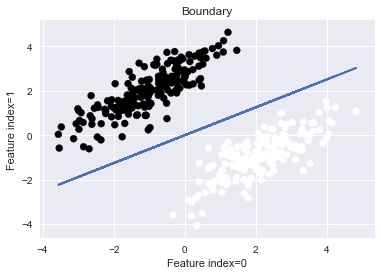

In [14]:
clf.plot_boundary(train_x, train_y, 0, 1)

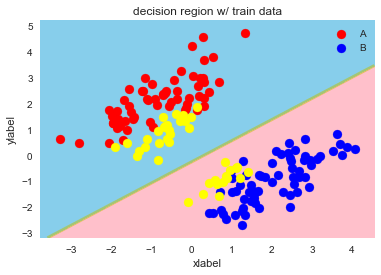

In [9]:
decision_region(test_x, 
                test_y, 
                clf,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['A', 'B'])

#### 【問題2】（アドバンス課題）多項式カーネル関数の作成
問題1では線形カーネルを使用しましたが、多項式カーネルにも切り替えられるようにしましょう。

In [10]:
clf_rbf = cScratchSVMClf.ScratchSVMClassifier(
    num_iter=10000, lr=1e-7, bias=True, hit_vector_cnt_threshold=2, kernel='rbf', gamma=5, theta0=0.3, pow_d=5)

In [11]:
pipeline(clf_rbf, train_x, train_y, test_x, test_y, normalization=True)

Initial lambda:
[[7.e-07 1.e-07 4.e-07 4.e-07 5.e-07 2.e-07 1.e-07 5.e-07 7.e-07 9.e-07
  3.e-07 2.e-07 3.e-07 2.e-07 1.e-07 2.e-07 7.e-07 5.e-07 5.e-07 6.e-07
  4.e-07 7.e-07 1.e-07 3.e-07 1.e-07 8.e-07 8.e-07 2.e-07 5.e-07 9.e-07
  1.e-07 4.e-07 5.e-07 7.e-07 2.e-07 4.e-07 4.e-07 3.e-07 5.e-07 5.e-07
  5.e-07 6.e-07 9.e-07 4.e-07 7.e-07 6.e-07 4.e-07 4.e-07 8.e-07 1.e-07
  8.e-07 5.e-07 1.e-07 6.e-07 4.e-07 7.e-07 8.e-07 1.e-07 4.e-07 3.e-07
  1.e-07 8.e-07 1.e-07 8.e-07 3.e-07 1.e-07 3.e-07 7.e-07 1.e-07 9.e-07
  4.e-07 4.e-07 7.e-07 7.e-07 7.e-07 5.e-07 3.e-07 6.e-07 5.e-07 3.e-07
  1.e-07 2.e-07 6.e-07 6.e-07 9.e-07 5.e-07 1.e-07 7.e-07 2.e-07 2.e-07
  4.e-07 1.e-07 4.e-07 2.e-07 4.e-07 2.e-07 5.e-07 8.e-07 7.e-07 5.e-07
  6.e-07 7.e-07 1.e-07 5.e-07 4.e-07 8.e-07 1.e-07 1.e-07 9.e-07 4.e-07
  7.e-07 6.e-07 8.e-07 4.e-07 3.e-07 9.e-07 2.e-07 4.e-07 9.e-07 4.e-07
  6.e-07 2.e-07 3.e-07 7.e-07 4.e-07 3.e-07 6.e-07 4.e-07 6.e-07 2.e-07
  2.e-07 6.e-07 9.e-07 4.e-07 3.e-07 3.e-07 5.e-

In [12]:
pred = clf_rbf.predict(test_x)
print("Accuracy=",clf_rbf.cal_accuracy(pred, test_y))
clf_rbf.view_result(pred, test_y)

Accuracy= 1.0
tp=60 tn=65 fp=0 fn=0


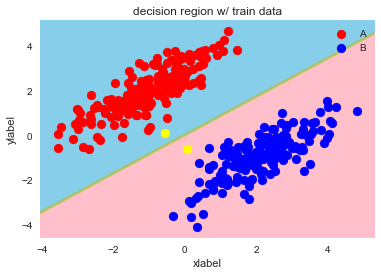

In [15]:
decision_region(train_x, 
                train_y, 
                clf_rbf,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['A', 'B'])

###### 結果
線形モデルと大きな違いはなかった。  
学習データがもともとよく分離されているため多項式の効果があまり現れなかった可能性がある。

##### 多項式を用いて別データを学習してみる

In [18]:
from sklearn.datasets import load_iris

In [24]:
iris_data_set = load_iris()
x = pd.DataFrame(iris_data_set.data, columns=iris_data_set.feature_names)    #Put explanatory variable into x as pandasdata frame
y = pd.DataFrame(iris_data_set.target, columns=['Species'])    #Put iris response variable into y as pandasdata frame
df = pd.concat([x, y], axis=1)

In [25]:
col_name = df.columns.values
data = df[[col_name[2], col_name[3], col_name[4]]]
data = data[data["Species"] != 0]
data.head()

,petal length (cm),petal width (cm),Species
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


In [44]:
train_feature, test_feature, train_target, test_target = train_test_split(data[['petal length (cm)', 'petal width (cm)']].values, data['Species'].values, test_size=0.4, random_state=None)

In [45]:
#学習データの特徴量を標準化
scaler = StandardScaler()
scaler.fit(train_feature)
train_feature = scaler.transform(train_feature)

scaler.fit(test_feature)
test_feature = scaler.transform(test_feature)

In [52]:
clf_line = cScratchSVMClf.ScratchSVMClassifier(
    num_iter=10000, lr=1e-7, bias=True, hit_vector_cnt_threshold=4)

In [53]:
clf_line.fit(train_feature, train_target, test_feature, test_target)

Initial lambda:
[[2.e-07 4.e-07 2.e-07 3.e-07 8.e-07 6.e-07 9.e-07 6.e-07 4.e-07 3.e-07
  6.e-07 5.e-07 9.e-07 2.e-07 1.e-07 9.e-07 9.e-07 5.e-07 1.e-07 5.e-07
  3.e-07 8.e-07 5.e-07 5.e-07 6.e-07 7.e-07 4.e-07 8.e-07 1.e-07 5.e-07
  5.e-07 6.e-07 9.e-07 6.e-07 7.e-07 2.e-07 5.e-07 6.e-07 4.e-07 7.e-07
  9.e-07 8.e-07 5.e-07 8.e-07 9.e-07 2.e-07 5.e-07 6.e-07 6.e-07 4.e-07
  9.e-07 4.e-07 6.e-07 4.e-07 5.e-07 7.e-07 2.e-07 8.e-07 7.e-07 6.e-07]]
Loop count=92
Support vector=
[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [ 0.24832911 -0.3673629   0.12519071 -1.72188533 -0.98305491 -1.96816213
   0.12519071  0.00205231  0.86402112 -0.61363971  1.11029793 -1.10619331
   1.11029793 -0.4905013   0.61774432]
 [-0.38905061 -0.38905061  0.51747508 -1.52220771 -1.52220771 -1.52220771
  -0.38905061 -0.38905061  0.29084366 -0.61568203 -0.16241919 -1.52220771
   1.19736934 

True

In [49]:
clf_rbf = cScratchSVMClf.ScratchSVMClassifier(
    num_iter=10000, lr=1e-7, bias=True, hit_vector_cnt_threshold=4, kernel='rbf', gamma=5, theta0=0.3, pow_d=5)

In [50]:
clf_rbf.fit(train_feature, train_target, test_feature, test_target)

Initial lambda:
[[4.e-07 9.e-07 9.e-07 4.e-07 3.e-07 2.e-07 5.e-07 8.e-07 7.e-07 9.e-07
  1.e-07 2.e-07 2.e-07 4.e-07 8.e-07 9.e-07 5.e-07 7.e-07 3.e-07 7.e-07
  1.e-07 1.e-07 3.e-07 1.e-07 6.e-07 1.e-07 5.e-07 8.e-07 8.e-07 2.e-07
  9.e-07 7.e-07 6.e-07 2.e-07 6.e-07 5.e-07 3.e-07 7.e-07 2.e-07 2.e-07
  8.e-07 6.e-07 5.e-07 2.e-07 6.e-07 8.e-07 9.e-07 3.e-07 5.e-07 8.e-07
  3.e-07 9.e-07 3.e-07 2.e-07 9.e-07 8.e-07 2.e-07 4.e-07 6.e-07 9.e-07]]
Loop count=93
Support vector=
[[ 1.          1.          1.          1.        ]
 [-0.2442245   0.12519071 -0.4905013   0.24832911]
 [-0.16241919 -0.38905061  0.06421224 -0.16241919]
 [-1.          1.          1.         -1.        ]]
Labe count 1:[2] -1:[2]
accuracy: 0.11666666666666667


True

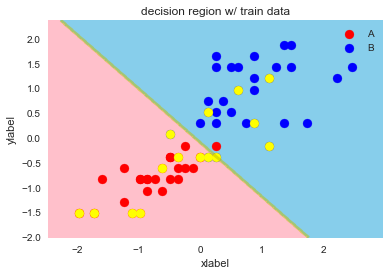

In [54]:
decision_region(train_feature, 
                train_target, 
                clf_line,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', ¥
                target_names=['A', 'B'])

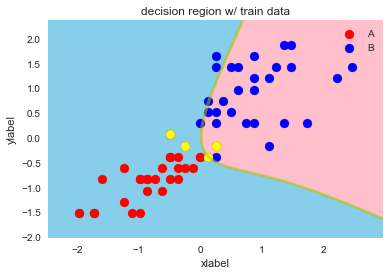

In [51]:
decision_region(train_feature, 
                train_target, 
                clf_rbf,
                step=0.01, 
                title='decision region w/ train data', 
                xlabel='xlabel', 
                ylabel='ylabel', 
                target_names=['A', 'B'])

In [56]:
pred = clf_line.predict(test_feature)
print("Accuracy=",clf_line.cal_accuracy(pred, test_target))
clf_line.view_result(pred, test_target)

Accuracy= 0.95
tp=40 tn=0 fp=20 fn=22


In [57]:
pred = clf_rbf.predict(test_feature)
print("Accuracy=",clf_rbf.cal_accuracy(pred, test_target))
clf_rbf.view_result(pred, test_target)

Accuracy= 0.175
tp=40 tn=0 fp=20 fn=25


###### 結果
線形モデルよりもよく分離ができている。

##### 【問題5】時間の計測
SVMの学習には時間がかかるため、効率的な実装が望まれます。事前学習期間に行なったように、時間を計測して改善していきましょう。特に 
λ
 の更新部分は繰り返し処理が多いため、効率的なコードを目指してください。